<center><h1> Visualization <br><br>
    <center> Wendy Shi

# Preparation

In [21]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
CA_shp =  gpd.read_file("tl_2020_06_bg/tl_2020_06_bg.shp")
CA_shp.head(3)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,053,001500,1,060530015001,Block Group 1,G5030,S,3348560,0,+36.6564570,-121.6749086,"POLYGON ((-121.69184 36.65885, -121.68510 36.6..."
1,06,073,002712,2,060730027122,Block Group 2,G5030,S,337744,0,+32.7303521,-117.0787620,"POLYGON ((-117.08306 32.72588, -117.08280 32.7..."
2,06,073,018601,2,060730186012,Block Group 2,G5030,S,886725,0,+33.2295683,-117.3482855,"POLYGON ((-117.35296 33.22489, -117.35294 33.2..."


In [10]:
#CA_shp.shape

(25607, 13)

In [126]:
#73 SD 75 SF
# 085: Santa Clara county
# LA County
LA_shp = CA_shp[CA_shp['COUNTYFP'] == '073']
LA_shp.shape

(2058, 13)

## Population

In [113]:
bg_pop = pd.read_csv("ACSDT5Y2020/ACSDT5Y2020.B01003-Data.csv")
bg_pop = bg_pop.drop(index=bg_pop.index[0]) #drop the first row
print(bg_pop.shape)
bg_pop.head(3)

(25607, 5)


,GEO_ID,NAME,B01003_001E,B01003_001M,Unnamed: 4
1,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",1713,359,NaN
2,1500000US060014001002,"Block Group 2, Census Tract 4001, Alameda Coun...",1322,221,NaN
3,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",940,155,NaN


In [114]:
bg_pop = bg_pop[['GEO_ID', 'B01003_001E']].copy()
rename = {'B01003_001E' : 'Population'}
bg_pop  = bg_pop.rename(columns = rename)
bg_pop.head(3)

,GEO_ID,Population
1,1500000US060014001001,1713
2,1500000US060014001002,1322
3,1500000US060014002001,940


In [115]:
bg_pop['GEOID'] = bg_pop['GEO_ID'].str[-12:]
bg_pop.head(3)

,GEO_ID,Population,GEOID
1,1500000US060014001001,1713,060014001001
2,1500000US060014001002,1322,060014001002
3,1500000US060014002001,940,060014002001


In [127]:
merged = pd.merge(LA_shp, bg_pop, on = 'GEOID', how = 'inner')
print(merged.shape)
merged.head(3)

(2058, 15)


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,GEO_ID,Population
0,06,073,002712,2,060730027122,Block Group 2,G5030,S,337744,0,+32.7303521,-117.0787620,"POLYGON ((-117.08306 32.72588, -117.08280 32.7...",1500000US060730027122,2060
1,06,073,018601,2,060730186012,Block Group 2,G5030,S,886725,0,+33.2295683,-117.3482855,"POLYGON ((-117.35296 33.22489, -117.35294 33.2...",1500000US060730186012,1845
2,06,073,018609,3,060730186093,Block Group 3,G5030,S,379311,0,+33.2495250,-117.3148675,"POLYGON ((-117.31819 33.25084, -117.31819 33.2...",1500000US060730186093,3003


In [128]:
gdf = merged[['GEOID','geometry', 'Population']].copy()
gdf['Population'] = gdf['Population'].astype(int)

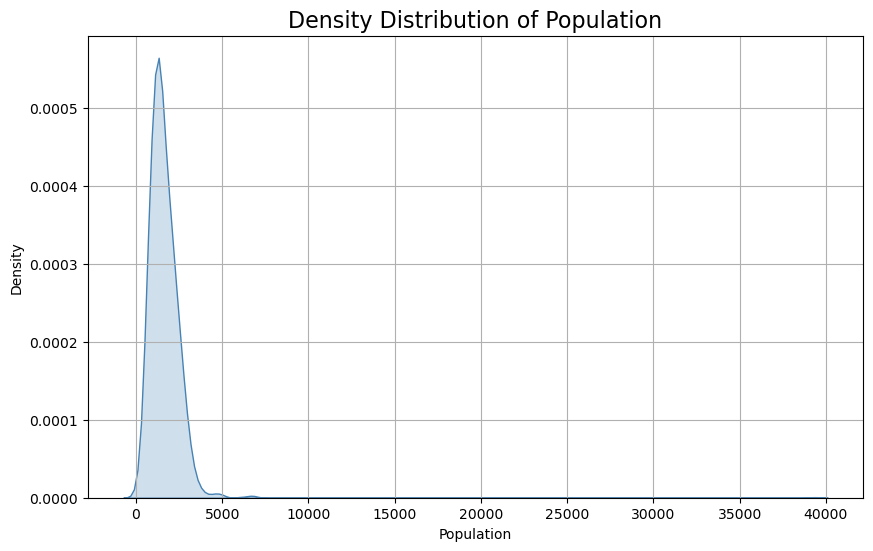

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the column is numeric and clean
gdf['Population'] = pd.to_numeric(gdf['Population'], errors='coerce')
gdf = gdf.dropna(subset=['Population'])

# Plot density
plt.figure(figsize=(10, 6))
sns.kdeplot(data=gdf, x='Population', fill=True, color='steelblue')
plt.title("Density Distribution of Population", fontsize=16)
plt.xlabel("Population")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [130]:
gdf = gdf[gdf['Population'] < 4000]

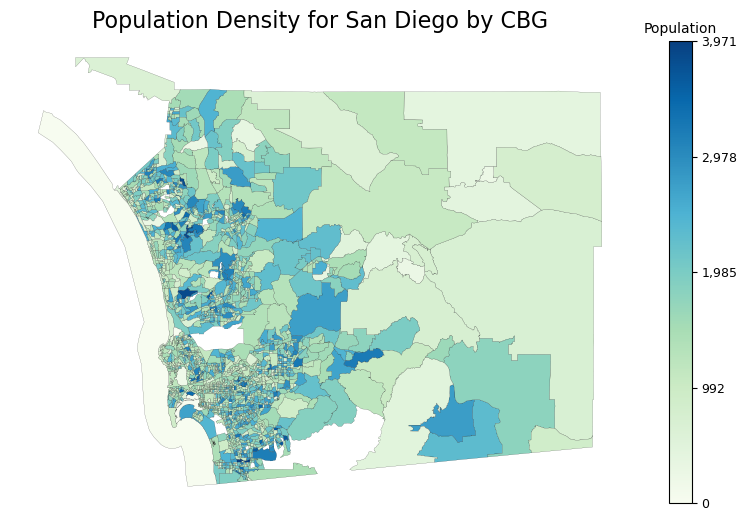

In [147]:
fig, ax = plt.subplots(figsize=(10, 10))
plot = gdf.plot(column='Population',
         cmap='GnBu',
         edgecolor='black',
         linewidth=0.1,
         ax=ax)

# Add colorbar
cbar = fig.colorbar(plot.collections[0], ax=ax, shrink=0.6)

# Set custom ticks
min_pop = gdf['Population'].min()
max_pop = gdf['Population'].max()
ticks = np.linspace(min_pop, max_pop, 5)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{int(tick):,}" for tick in ticks])
cbar.ax.tick_params(labelsize=9)

# Set label on top of the colorbar
cbar.ax.set_title("Population", fontsize= 10)

#tweak spacing if the label is too close to the ticks
#cbar.ax.title.set_position([0.5, 1]) 

# Hide axes and show
ax.set_title(r"Population Density for San Diego by CBG", fontsize=16)
ax.axis('off')

fig.savefig("CBG_SF.png", dpi=300, bbox_inches='tight')

plt.show()
